#**Sentiment Analysis using LSTM on IMDb Reviews**

<p align="center">
  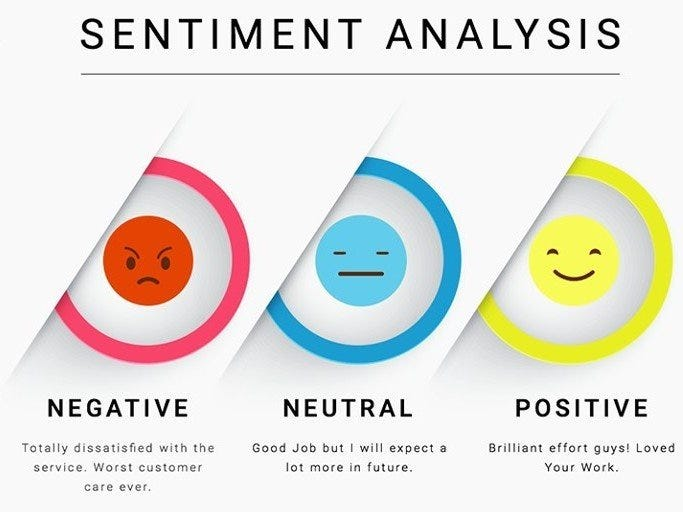
</p>

The goal here was to build a system that can read movie reviews and tell whether the review is positive or negative. For that, I used the IMDb dataset which is already available in TensorFlow/Keras. It has 25,000 training and 25,000 testing reviews, all already labeled. We just load the data and start working from there.

I decided to keep only the top 10,000 words to make the model faster and smaller, and also cut all reviews to 200 words max (by padding/truncating). Then I split the training set further into training and validation using train_test_split.



## Model Setup and Training
For the model, I used a simple LSTM-based architecture. First comes the Embedding layer which helps in converting word indices into dense vectors, followed by an LSTM layer with 64 units. I also added dropout (0.6) and L2 regularization to avoid overfitting. At the end, there's a dense layer with sigmoid activation since it's a binary classification problem.

To compile the model, I used binary cross-entropy as the loss function and Adam as the optimizer. I also added EarlyStopping to make sure the model doesn’t over-train and start overfitting. I trained the model for max 20 epochs, but it usually stopped earlier based on validation loss.

## Evaluation & Results
After training, I tested the model on the actual test set. Predictions were done by setting a threshold of 0.5 — if the output was greater than 0.5, it's considered a positive review, otherwise negative.

I then printed out the confusion matrix, classification report, and overall accuracy score. The model gave pretty good results — around 84-87% accuracy on the test set. Precision, recall, and F1-score for both classes also looked balanced.

##  Accuracy and Loss Curves
I plotted the training vs validation accuracy and loss to see how the model performed over the epochs. The plots showed that training and validation loss were decreasing steadily, and accuracy was improving — which means the model was learning and not overfitting much thanks to dropout and regularization.

##**Impoting Important Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

###**Data Collection**

In [ ]:
# Only consider the top 10,000 most frequent words
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

###**Preprocessing**

The sequences are padded so that all reviews are of the same length (200 words).

In [ ]:
max_len = 200  # Cut off reviews after 200 words
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data
x_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)


###**Build the LSTM Model**


*   Embedding layer converts word indexes into dense vectors.

* LSTM layer captures sequential dependencies in text.

* Dropout prevents overfitting.

* Dense layer with sigmoid for binary classification.




In [ ]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.05)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
# Early Stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

###**Train the Model**

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 420ms/step - accuracy: 0.5653 - loss: 4.7820 - val_accuracy: 0.7820 - val_loss: 0.5873
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 64s 407ms/step - accuracy: 0.8454 - loss: 0.4537 - val_accuracy: 0.8418 - val_loss: 0.4316
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 407ms/step - accuracy: 0.8963 - loss: 0.3569 - val_accuracy: 0.8664 - val_loss: 0.3666
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 431ms/step - accuracy: 0.9179 - loss: 0.3072 - val_accuracy: 0.8594 - val_loss: 0.3999
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 408ms/step - accuracy: 0.9310 - loss: 0.2641 - val_accuracy: 0.8734 - val_loss: 0.3514
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 430ms/step - accuracy: 0.9419 - loss: 0.2352 - val_accuracy: 0.8684 - val_loss: 0.3596
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 407ms/step - accuracy: 0.9484 - loss: 0.2175 - val_accuracy: 0.8668 - val_loss: 0.3576
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 428ms/step - accuracy: 0.9540 - loss: 0

###**Evaluate the Model**

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step
Confusion Matrix:
 [[10871  1629]
 [ 1749 10751]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000


Accuracy Score: 0.86488


###**Plot Accuracy and Loss Graphs**

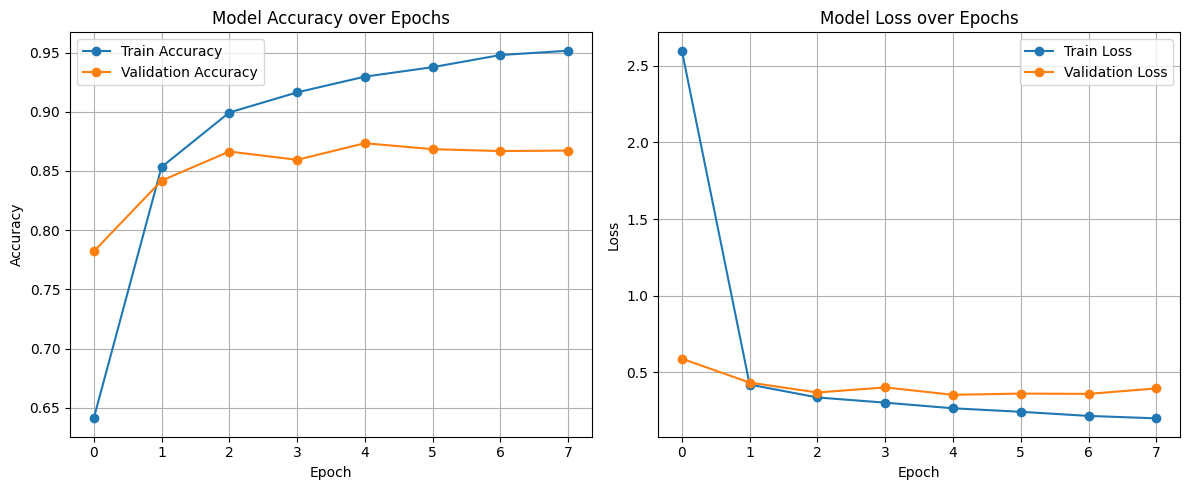

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
